In [1]:
import gc
import pandas as pd
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt
from simpletransformers.classification import ClassificationModel
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
import json
gc.collect()
torch.cuda.empty_cache()


dataset = "GINCO"

train_df = pd.read_csv("/home/tajak/CORE-experiments/data/SI_GINCO_train.csv")
dev_df = pd.read_csv("/home/tajak/CORE-experiments/data/SI_GINCO_dev.csv")
test_df = pd.read_csv("/home/tajak/CORE-experiments/data/SI_GINCO_test.csv")

print(f"GINCO train-dev-test: {train_df.shape},{dev_df.shape}, {test_df.shape}")

In [2]:
# For training on CORE:
dataset = "CORE"

train_df = pd.read_csv("/home/tajak/CORE-experiments/data/CORE_final_train.csv")
dev_df = pd.read_csv("/home/tajak/CORE-experiments/data/CORE_final_dev.csv")
test_df = pd.read_csv("/home/tajak/CORE-experiments/data/CORE_final_test.csv")

print("CORE train shape: {}, Dev shape: {}, Test shape: {}.".format(train_df.shape, dev_df.shape, test_df.shape))

CORE train shape: (20350, 2), Dev shape: (6784, 2), Test shape: (6784, 2).


In [3]:
remainder,new_dev_df= train_test_split(dev_df, test_size=1000, random_state=42, shuffle = True, stratify = dev_df.labels)

dev_df = new_dev_df
dev_df.describe()

,text,labels
count,1000,1000
unique,1000,12
top,Read what our clients are saying! Thank you ve...,News
freq,1,373


In [4]:
LABELS = train_df.labels.unique().tolist()
LABELS

['Opinion/Argumentation',
 'News',
 'Review',
 'Information/Explanation',
 'Promotion',
 'Instruction',
 'Recipe',
 'Research Article',
 'Forum',
 'Legal/Regulation',
 'Interview',
 'Prose']

In [5]:
results_hyperparameter_search = []

In [6]:
previous_results_file = open("/home/tajak/CORE-experiments/hyperparameter-search-results-crosloengualbert.json")
previous_results = json.load(previous_results_file)
len(previous_results)

13

1. experiments with GINCO:
* epoch_set_GINCO: 90 (XLM Roberta optimum epoch 60)
* lr_set_GINCO: 1e-05 (XLM Roberta  optimum lr 1e-5)

Results on dev_split with optimum hyperparameters: MicroF1: 0.759, MacroF1: 0.673

2. experiments with CORE:
* epoch_set_CORE: 6 (XLM Roberta optimum epoch 9)
* lr_set_CORE: 1e-5 (XLM Roberta optimum lr 1e-5)

Results on dev_split with optimum hyperparameters: MicroF1: 0.765, MacroF1: 0.724

Some weights of the model checkpoint at EMBEDDIA/crosloengual-bert were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model chec

Training for hyperparameter 1e-06 completed. Testing started ...
Macro f1: 0.515, Micro f1: 0.733


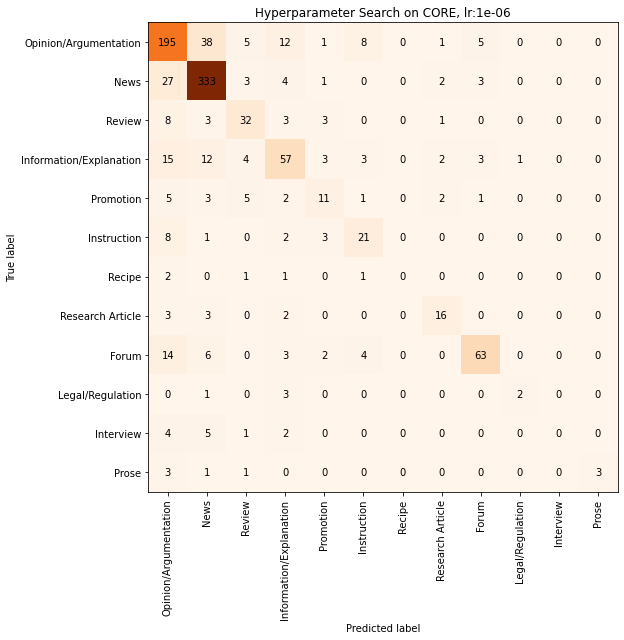

Some weights of the model checkpoint at EMBEDDIA/crosloengual-bert were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model chec

Training for hyperparameter 1e-05 completed. Testing started ...
Macro f1: 0.724, Micro f1: 0.765


<Figure size 432x288 with 0 Axes>

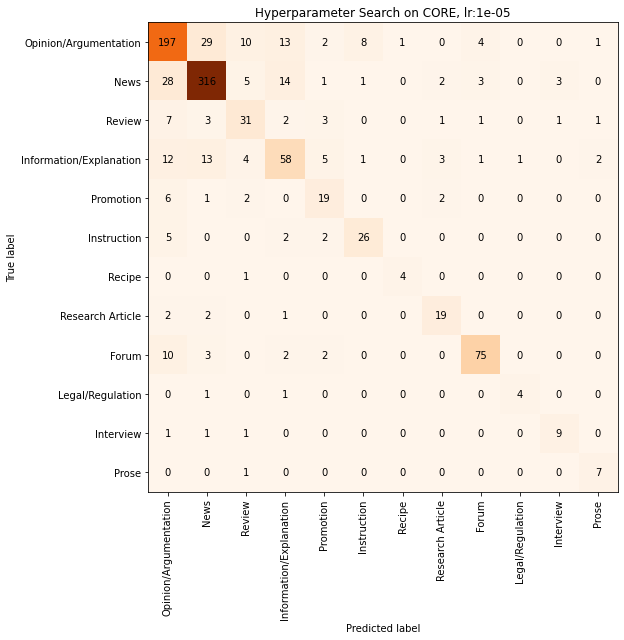

Some weights of the model checkpoint at EMBEDDIA/crosloengual-bert were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model chec

Training for hyperparameter 0.0001 completed. Testing started ...
Macro f1: 0.654, Micro f1: 0.717


<Figure size 432x288 with 0 Axes>

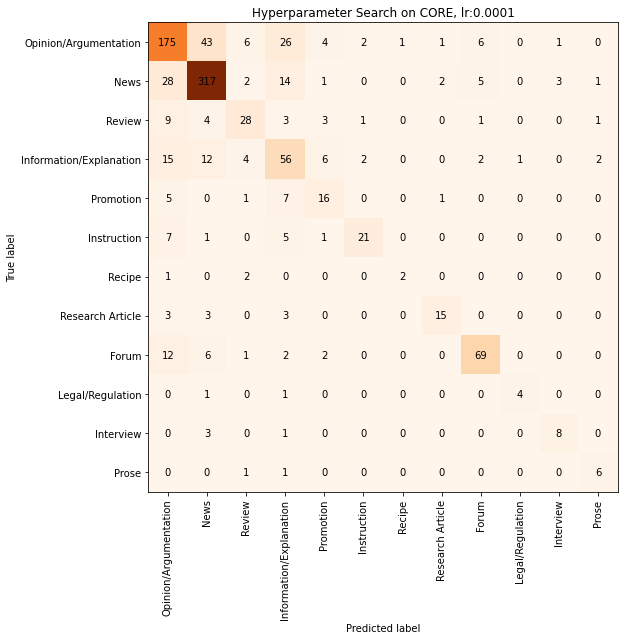

<Figure size 432x288 with 0 Axes>

In [7]:
# Define which hyperparameter are you experimenting with:
hyp_name = "lr"

# Set the hyperparameter values you want to try:
#lr_set_GINCO = [1e-6, 1e-5, 1e-4]
lr_set_CORE = [1e-6, 1e-5, 1e-4] 
#epoch_set_GINCO = [30, 60, 90, 120]
#epoch_set_CORE = [2, 3, 6, 9, 12, 15]

hyperparameter_set = lr_set_CORE


# For each experiment, change one hyperparameter and substitute it with "hyperparameter"

for hyperparameter in hyperparameter_set:
    
        # Define the model: "bert", "EMBEDDIA/crosloengual-bert" // ali pa // "xlmroberta", "xlm-roberta-base",
        model = ClassificationModel(
        "bert", "EMBEDDIA/crosloengual-bert",
        num_labels=len(LABELS),
        use_cuda=True,
        args= {
             "overwrite_output_dir": True,
             "num_train_epochs": 6,
             "labels_list": LABELS,
             "learning_rate": hyperparameter,
             "no_cache": True,
             "no_save": True,
             "max_seq_length": 512,
             "save_steps": -1,
             "silent":True,
             }
        )

        # Train the model on train data
        model.train_model(train_df)

        print(f"Training for hyperparameter {hyperparameter} completed. Testing started ...")

        # Evaluate te model on dev data
        
            # Get the true labels from the dev
        y_true = dev_df.labels
        
             # Calculate the model's predictions on dev
        def make_prediction(input_string):
            return model.predict([input_string])[0][0]

        y_pred = dev_df.text.apply(make_prediction)

        # Calculate the scores
        macro = f1_score(y_true, y_pred, labels=LABELS, average="macro")
        micro = f1_score(y_true, y_pred, labels=LABELS,  average="micro")
        print(f"Macro f1: {macro:0.3}, Micro f1: {micro:0.3}")
        
        # Plot the confusion matrix:
        cm = confusion_matrix(y_true, y_pred, labels=LABELS)
        plt.figure(figsize=(9, 9))
        plt.imshow(cm, cmap="Oranges")
        for (i, j), z in np.ndenumerate(cm):
            plt.text(j, i, '{:d}'.format(z), ha='center', va='center')
        classNames = LABELS
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        tick_marks = np.arange(len(classNames))
        plt.xticks(tick_marks, classNames, rotation=90)
        plt.yticks(tick_marks, classNames)
        plt.title(f"Hyperparameter Search on {dataset}, {hyp_name}:{hyperparameter}")
        
        plt.tight_layout()
        fig1 = plt.gcf()
        plt.show()
        plt.draw()
        fig1.savefig(f"Hyperparameter-search-{dataset}-{hyp_name}-{hyperparameter}.png",dpi=100)

        # Save the results:
        rezdict = {
            "corpus": dataset,
            "hyperparameter":hyp_name,
            "hyp_value":hyperparameter,
            "microF1": micro,
            "macroF1": macro,
            "y_true": y_true.tolist(),
            "y_pred": y_pred.tolist(),
            }
        results_hyperparameter_search.append(rezdict)
        previous_results.append(rezdict)

        #Save intermediate results (just in case)
        backup = []
        backup.append(rezdict)
        with open(f"backup-results-{dataset}-{hyp_name}-{hyperparameter}-CroSloEngualBert.json", "w") as backup_file:
            json.dump(backup,backup_file, indent= "")

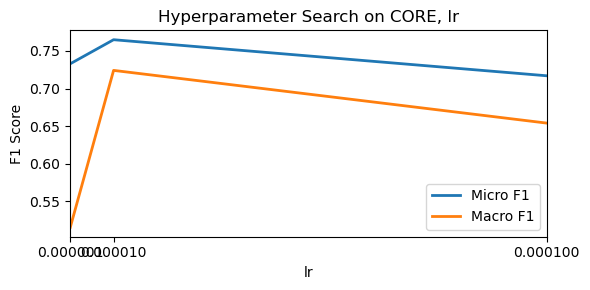

In [8]:
# After the loop, compare the results:
#plt.style.use('_mpl-gallery')

x = []
mi = []
ma = []

for i in results_hyperparameter_search:
    if i["hyperparameter"] == hyp_name and i["corpus"] == dataset:
        x.append(i["hyp_value"])
        mi.append(i['microF1'])
        ma.append(i["macroF1"])

# plot
fig, ax = plt.subplots(figsize=(6,3), dpi=100)

ax.plot(x, mi, linewidth=2.0, label="Micro F1")
ax.plot(x, ma, linewidth=2.0, label="Macro F1")

ax.set(xlim=(min(x), max(x)),xticks=x)

ax.set_xlabel(f'{hyp_name}')
ax.set_ylabel('F1 Score')
ax.legend(loc="lower right")

plt.title(f"Hyperparameter Search on {dataset}, {hyp_name}")
plt.tight_layout()
plt.savefig(f"Hyperparameter-search-{dataset}-{hyp_name}.png")
plt.show()

In [9]:
len(previous_results)

16

In [10]:
# Save the file with updated results.
with open("/home/tajak/CORE-experiments/hyperparameter-search-results-crosloengualbert.json", "w") as results_file:
    json.dump(previous_results,results_file, indent= "")

In [11]:
gc.collect()
torch.cuda.empty_cache()